<div>
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" width=100>
</div>

# Project 3: Web APIs & NLP

## Background

[Reddit](https:www.reddit.com) is a network of communities where people can dive into their interests, hobbies and passions. Subreddits are user-created channels where discussion on the topic of interest, hobby or passion are organized. From [Metrics For Reddit](https://frontpagemetrics.com/history), there are over 3.2 million subreddits as of December 2021, with hundreds of subreddits being created every day. 

1. Using [Pushshift's](https://github.com/pushshift/api) API, posts are collected from the two subreddits of [nosleep](https://www.reddit.com/r/nosleep/) and [paranormal](https://www.reddit.com/r/paranormal/).
2. `You'll then use NLP to train a classifier on which subreddit a given post came from.`

## Problem Statement

As there are many different subreddits on Reddit, and since interests, hobbies and passions can be similar, there are always various subreddits that are similar to each other. Without a doubt, anyone who is new to writing and posting to Reddit can be confused as to which subreddit to post to. In this project, the aim is to assist the new Reddit user in the decision of which subreddit to make the post in.

For the context of this project, the post is in the form of a scary experience, and the choices of the two of the subreddits are [nosleep](https://www.reddit.com/r/nosleep/) and [paranormal](https://www.reddit.com/r/paranormal/), two subreddits that cater to scary personal experiences and paranormal experiences, thoughts and theories.

## Progress so far

Using the [Pushshift's](https://github.com/pushshift/api) API, posts are collected from the two subreddits of [nosleep](https://www.reddit.com/r/nosleep/) and [paranormal](https://www.reddit.com/r/paranormal/), and then compiled into CSVs.

`At this point in time, `

## Part 3: Modelling and Analysis

### Imports (All imported libraries are added here)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Importing the Dataset

In [2]:
# Importing the preprocessed dataset
df = pd.read_csv('../datasets/data_model.csv')

In [3]:
# Checking the first 5 rows 
df.head()

,subreddit,text,text_stoptokens,text_lem,text_stem,text_stemlem
0,1,I created a new plant. It's gonna hurt a lot o...,"['created', 'new', 'plant', 'gonna', 'hurt', '...",created new plant gonna hurt lot people create...,creat new plant gonna hurt lot peopl creat new...,creat new plant gonna hurt lot peopl creat new...
1,1,The people I kill won't stay dead. I'm not wri...,"['people', 'kill', 'stay', 'dead', 'writing', ...",people kill stay dead writing sort confession ...,peopl kill stay dead write sort confess event ...,peopl kill stay dead write sort confess event ...
2,1,Don't got to the Magic Show at the Gypsy Carni...,"['got', 'magic', 'show', 'gypsy', 'carnival', ...",got magic show gypsy carnival final part 1 l p...,got magic show gypsi carniv final part 1 l par...,got magic show gypsi carniv final part 1 l par...
3,1,"""Intent: The Truth"" - Randonauting is not that...","['intent', 'truth', 'randonauting', 'fun', 'he...",intent truth randonauting fun hell ella exclai...,intent truth randonaut fun hell ella exclaim w...,intent truth randonaut fun hell ella exclaim w...
4,1,Accused in the Woods I have had the privilege ...,"['accused', 'woods', 'privilege', 'living', 'a...",accused wood privilege living america country ...,accus wood privileg live america countri one f...,accus wood privileg live america countri one f...


In [4]:
# Checking the shape of dataframe
df.shape

(1450, 6)

### Modelling

For the modelling process, since we are attempting to train our model based solely on the text content of the subreddit post, the only feature (ie X variable) will be one of the above `text` columns. The four `text` columns are namely the `text` columns that have undergone text preprocessing of: None, Lemmentization, Stemming, or Lemmentization and Stemming.

In the modelling process, we will be using one of the two transformers `CountVectorizer` or `TFIDVectorizer`, and one of the following estimators: `MultinomialNB`, `LogisticRegression`, `KNeighborsClassifier`.

#### Set up the data for modelling

For now, the target variable is the `subreddit` column, and the feature column chosen will be the `text_stemlem` column. The value of 1 for `subreddit` is for `nosleep` and the value of 0 is for `paranormal`.

In [5]:
# determining the X and y variables
X = df['text_stemlem']
y = df['subreddit']

In [6]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42)

In [7]:
# baseline accuracy
y.value_counts(normalize=True)

0    0.568966
1    0.431034
Name: subreddit, dtype: float64

At this point in time, let's do a quick check on the top occurring words for the X variable. We will be using `CountVectorizer` to do this.

In [8]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer()

# Fit the vectorizer on our corpus.
cvec.fit(X_train)

# Transform the X variable, Z_train is used so that we do not have to redefine the train/test split again
Z_train = cvec.transform(X_train)
Z_test = cvec.transform(X_test)

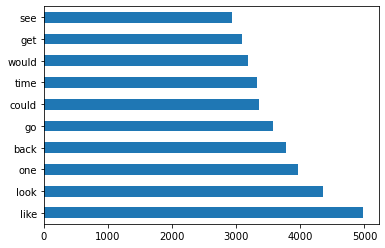

In [9]:
# Convert Z_train into a DataFrame.
Z_train_df = pd.DataFrame(Z_train.todense(), 
                          columns=cvec.get_feature_names_out(Z_train))

# plot top occuring words
Z_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

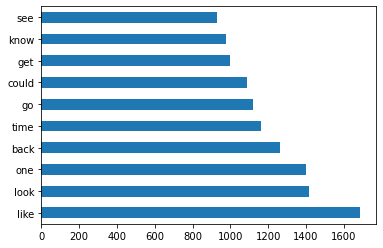

In [10]:
# Convert Z_test into a DataFrame.
Z_test_df = pd.DataFrame(Z_test.todense(), 
                          columns=cvec.get_feature_names_out(Z_test))

# plot top occuring words
Z_test_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

### 1. Naive Bayes Model

#### 1.1 Naive Bayes Model with CountVectorizer

In [11]:
# Instantiate a Pipeline with CountVectorizer (Transformer) and MultinomialNB (Estimator)
pipe_nb_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Hyperparameters for the above pipeline
pipe_nb_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000],
    'cvec__min_df': [1, 3, 5],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1), (1,2)]    
}

In [12]:
# Instantiate GridSearchCV with pipeline of CountVectorizer (Transformer) and MultinomialNB (Estimator)
gs_nb_cvec = GridSearchCV(pipe_nb_cvec, pipe_nb_cvec_params, cv = 5)

In [13]:
%%time
# Fit GridSearch to training data.
gs_nb_cvec.fit(X_train, y_train)

# best parameters from the GridSearch
gs_nb_cvec.best_params_

Wall time: 4min 11s


{'cvec__max_df': 0.7,
 'cvec__max_features': 4000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [14]:
# Score model on training set
print(gs_nb_cvec.score(X_train, y_train))

# Score model on testing set
print(gs_nb_cvec.score(X_test, y_test))

0.9457221711131555
0.9449035812672176


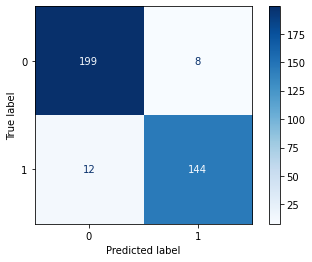

In [15]:
# Get predictions from model
pred_nb_cvec = gs_nb_cvec.predict(X_test)

# Save confusion matrix values of model
tn, fp, fn, tp = confusion_matrix(y_test, pred_nb_cvec).ravel()

# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_nb_cvec, cmap='Blues', values_format='d');

In [16]:
# Calculate the specificity
spec_nb_cvec = round(tn / (tn + fp), 3)
print('Specificity: ', spec_nb_cvec)

# Calculate the specificity
sens_nb_cvec = round(tp / (tp + fn), 3)
print('Sensitivity: ', sens_nb_cvec)

Specificity:  0.961
Sensitivity:  0.923


#### 1.2 Naive Bayes Model with TfidfVectorizer

In [17]:
# Instantiate a Pipeline with TfidfVectorizer (Transformer) and MultinomialNB (Estimator)
pipe_nb_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# Hyperparameters for the above pipeline
pipe_nb_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000],
    'tvec__min_df': [1, 3, 5],
    'tvec__max_df': [.7, .8, .9],
    'tvec__ngram_range': [(1,1), (1,2)]    
}

In [18]:
# Instantiate GridSearchCV with pipeline of TfidfVectorizer (Transformer) and MultinomialNB (Estimator)
gs_nb_tvec = GridSearchCV(pipe_nb_tvec, pipe_nb_tvec_params, cv = 5)

In [19]:
%%time
# Fit GridSearch to training data.
gs_nb_tvec.fit(X_train, y_train)

# best parameters from the GridSearch
gs_nb_tvec.best_params_

Wall time: 4min 17s


{'tvec__max_df': 0.7,
 'tvec__max_features': 4000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 1)}

In [20]:
# Score model on training set
print(gs_nb_tvec.score(X_train, y_train))

# Score model on testing set
print(gs_nb_tvec.score(X_test, y_test))

0.9512419503219871
0.9393939393939394


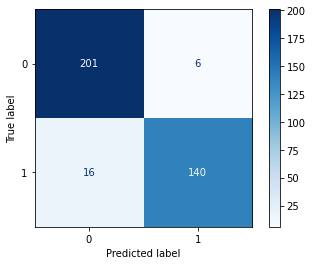

In [21]:
# Get predictions from model
pred_nb_tvec = gs_nb_tvec.predict(X_test)

# Save confusion matrix values of model
tn, fp, fn, tp = confusion_matrix(y_test, pred_nb_tvec).ravel()

# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_nb_tvec, cmap='Blues', values_format='d');

In [24]:
# Calculate the specificity
spec_nb_tvec = round(tn / (tn + fp), 3)
print('Specificity: ', spec_nb_tvec)

# Calculate the specificity
sens_nb_tvec = round(tp / (tp + fn), 3)
print('Sensitivity: ', sens_nb_tvec)

Specificity:  0.971
Sensitivity:  0.897


### 2. Logistic Regression Model

#### 2.1 Logistic Regression Model with CountVectorizer

In [22]:
# Instantiate a Pipeline with CountVectorizer (Transformer) and LogisticRegression (Estimator)
pipe_logreg_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Hyperparameters for the above pipeline
pipe_logreg_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000],
    'cvec__min_df': [1, 3, 5],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1), (1,2)]    
}

In [26]:
# Instantiate GridSearchCV with pipeline of CountVectorizer (Transformer) and LogisticRegression (Estimator)
gs_logreg_cvec = GridSearchCV(pipe_logreg_cvec, pipe_logreg_cvec_params, cv = 5)

In [27]:
%%time
# Fit GridSearch to training data.
gs_logreg_cvec.fit(X_train, y_train)

# best parameters from the GridSearch
gs_logreg_cvec.best_params_

Wall time: 4min 24s


{'cvec__max_df': 0.8,
 'cvec__max_features': 3000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1)}

In [28]:
# Score model on training set
print(gs_logreg_cvec.score(X_train, y_train))

# Score model on testing set
print(gs_logreg_cvec.score(X_test, y_test))

0.9990800367985281
0.9559228650137741


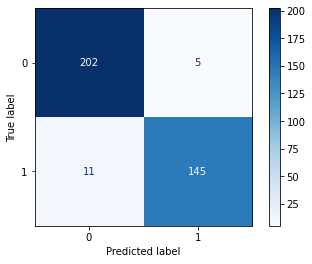

In [31]:
# Get predictions from model
pred_logreg_cvec = gs_logreg_cvec.predict(X_test)

# Save confusion matrix values of model
tn, fp, fn, tp = confusion_matrix(y_test, pred_logreg_cvec).ravel()

# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg_cvec, cmap='Blues', values_format='d');

In [32]:
# Calculate the specificity
spec_logreg_cvec = round(tn / (tn + fp), 3)
print('Specificity: ', spec_logreg_cvec)

# Calculate the specificity
sens_logreg_cvec = round(tp / (tp + fn), 3)
print('Sensitivity: ', sens_logreg_cvec)

Specificity:  0.976
Sensitivity:  0.929


#### 2.2 Logistic Regression Model with TfidfVectorizer

In [33]:
# Instantiate a Pipeline with TfidfVectorizer (Transformer) and LogisticRegression (Estimator)
pipe_logreg_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Hyperparameters for the above pipeline
pipe_logreg_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000],
    'tvec__min_df': [1, 3, 5],
    'tvec__max_df': [.7, .8, .9],
    'tvec__ngram_range': [(1,1), (1,2)]    
}

In [34]:
# Instantiate GridSearchCV with pipeline of TfidfVectorizer (Transformer) and LogisticRegression (Estimator)
gs_logreg_tvec = GridSearchCV(pipe_logreg_tvec, pipe_logreg_tvec_params, cv = 5)

In [35]:
%%time
# Fit GridSearch to training data.
gs_logreg_tvec.fit(X_train, y_train)

# best parameters from the GridSearch
gs_logreg_tvec.best_params_

Wall time: 4min 22s


{'tvec__max_df': 0.7,
 'tvec__max_features': 2000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2)}

In [36]:
# Score model on training set
print(gs_logreg_tvec.score(X_train, y_train))

# Score model on testing set
print(gs_logreg_tvec.score(X_test, y_test))

0.968721251149954
0.953168044077135


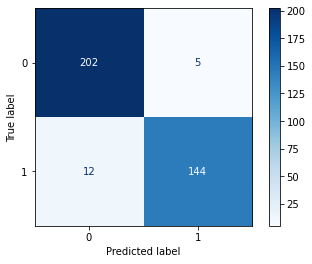

In [37]:
# Get predictions from model
pred_logreg_tvec = gs_logreg_tvec.predict(X_test)

# Save confusion matrix values of model
tn, fp, fn, tp = confusion_matrix(y_test, pred_logreg_tvec).ravel()

# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg_tvec, cmap='Blues', values_format='d');

In [38]:
# Calculate the specificity
spec_logreg_tvec = round(tn / (tn + fp), 3)
print('Specificity: ', spec_logreg_tvec)

# Calculate the specificity
sens_logreg_tvec = round(tp / (tp + fn), 3)
print('Sensitivity: ', sens_logreg_tvec)

Specificity:  0.976
Sensitivity:  0.923


### 3. K Nearest Neighbors Model

#### 3.1 K Nearest Neighbors Model with CountVectorizer

In [40]:
# Instantiate a Pipeline with CountVectorizer (Transformer) and KNeighborsClassifier (Estimator)
pipe_knn_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('knn', KNeighborsClassifier())
])

# Hyperparameters for the above pipeline
pipe_knn_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000],
    'cvec__min_df': [1, 3, 5],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1), (1,2)]    
}

In [41]:
# Instantiate GridSearchCV with pipeline of CountVectorizer (Transformer) and KNeighborsClassifier (Estimator)
gs_knn_cvec = GridSearchCV(pipe_knn_cvec, pipe_knn_cvec_params, cv = 5)

In [42]:
%%time
# Fit GridSearch to training data.
gs_knn_cvec.fit(X_train, y_train)

# best parameters from the GridSearch
gs_knn_cvec.best_params_

Wall time: 4min 21s


{'cvec__max_df': 0.8,
 'cvec__max_features': 2000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2)}

In [43]:
# Score model on training set
print(gs_knn_cvec.score(X_train, y_train))

# Score model on testing set
print(gs_knn_cvec.score(X_test, y_test))

0.7948482060717571
0.790633608815427


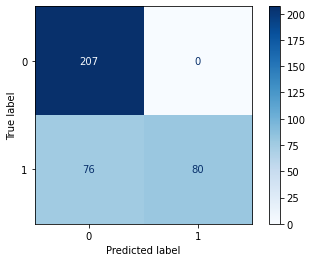

In [44]:
# Get predictions from model
pred_knn_cvec = gs_knn_cvec.predict(X_test)

# Save confusion matrix values of model
tn, fp, fn, tp = confusion_matrix(y_test, pred_knn_cvec).ravel()

# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_knn_cvec, cmap='Blues', values_format='d');

In [46]:
# Calculate the specificity
spec_knn_cvec = round(tn / (tn + fp), 3)
print('Specificity: ', spec_knn_cvec)

# Calculate the specificity
sens_knn_cvec = round(tp / (tp + fn), 3)
print('Sensitivity: ', sens_knn_cvec)

Specificity:  1.0
Sensitivity:  0.513


#### 3.2 KNeighborsClassifier Model with TfidfVectorizer

In [50]:
# Instantiate a Pipeline with TfidfVectorizer (Transformer) and KNeighborsClassifier (Estimator)
pipe_knn_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('knn', KNeighborsClassifier())
])

# Hyperparameters for the above pipeline
pipe_knn_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000],
    'tvec__min_df': [1, 3, 5],
    'tvec__max_df': [.7, .8, .9],
    'tvec__ngram_range': [(1,1), (1,2)]    
}

In [51]:
# Instantiate GridSearchCV with pipeline of TfidfVectorizer (Transformer) and KNeighborsClassifier (Estimator)
gs_knn_tvec = GridSearchCV(pipe_knn_tvec, pipe_knn_tvec_params, cv = 5)

In [52]:
%%time
# Fit GridSearch to training data.
gs_knn_tvec.fit(X_train, y_train)

# best parameters from the GridSearch
gs_knn_tvec.best_params_

Wall time: 4min 24s


{'tvec__max_df': 0.8,
 'tvec__max_features': 4000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

In [53]:
# Score model on training set
print(gs_knn_tvec.score(X_train, y_train))

# Score model on testing set
print(gs_knn_tvec.score(X_test, y_test))

0.968721251149954
0.953168044077135


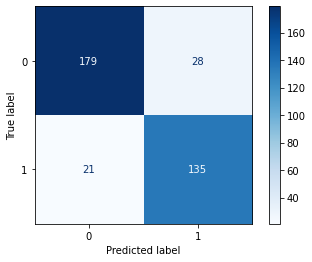

In [54]:
# Get predictions from model
pred_knn_tvec = gs_knn_tvec.predict(X_test)

# Save confusion matrix values of model
tn, fp, fn, tp = confusion_matrix(y_test, pred_knn_tvec).ravel()

# View confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_knn_tvec, cmap='Blues', values_format='d');

In [55]:
# Calculate the specificity
spec_knn_tvec = round(tn / (tn + fp), 3)
print('Specificity: ', spec_knn_tvec)

# Calculate the specificity
sens_knn_tvec = round(tp / (tp + fn), 3)
print('Sensitivity: ', sens_knn_tvec)

Specificity:  0.865
Sensitivity:  0.865
